In [55]:
#importing necessory libarary
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
#There are negative numbmers in experience! maybe typing error. 
# Convert to non-negative using .abs function
df['Experience']=df['Experience'].abs()

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


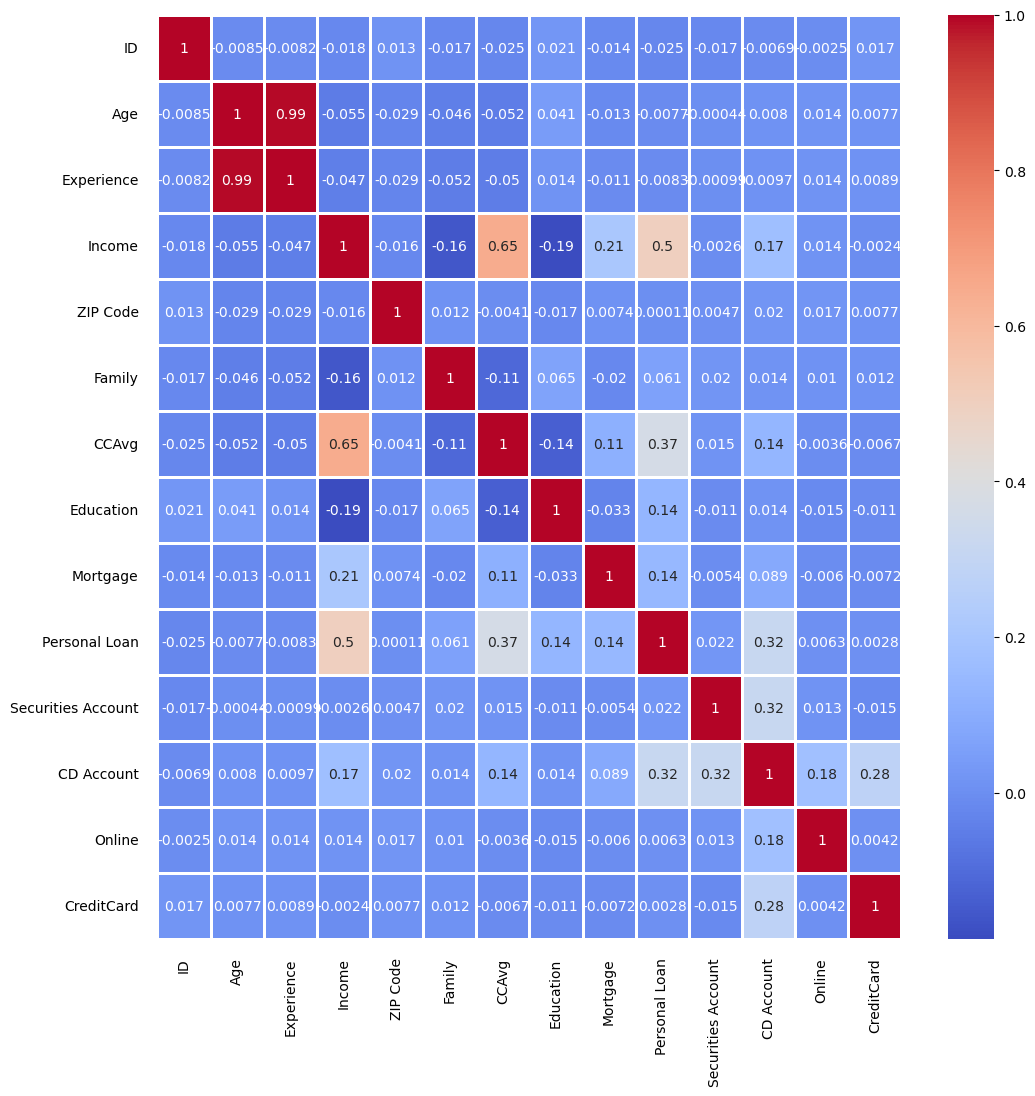

In [9]:
plt.figure(figsize=(12,12))
ax=sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=2)
ax.tick_params(size=10,color='w',labelsize=10)

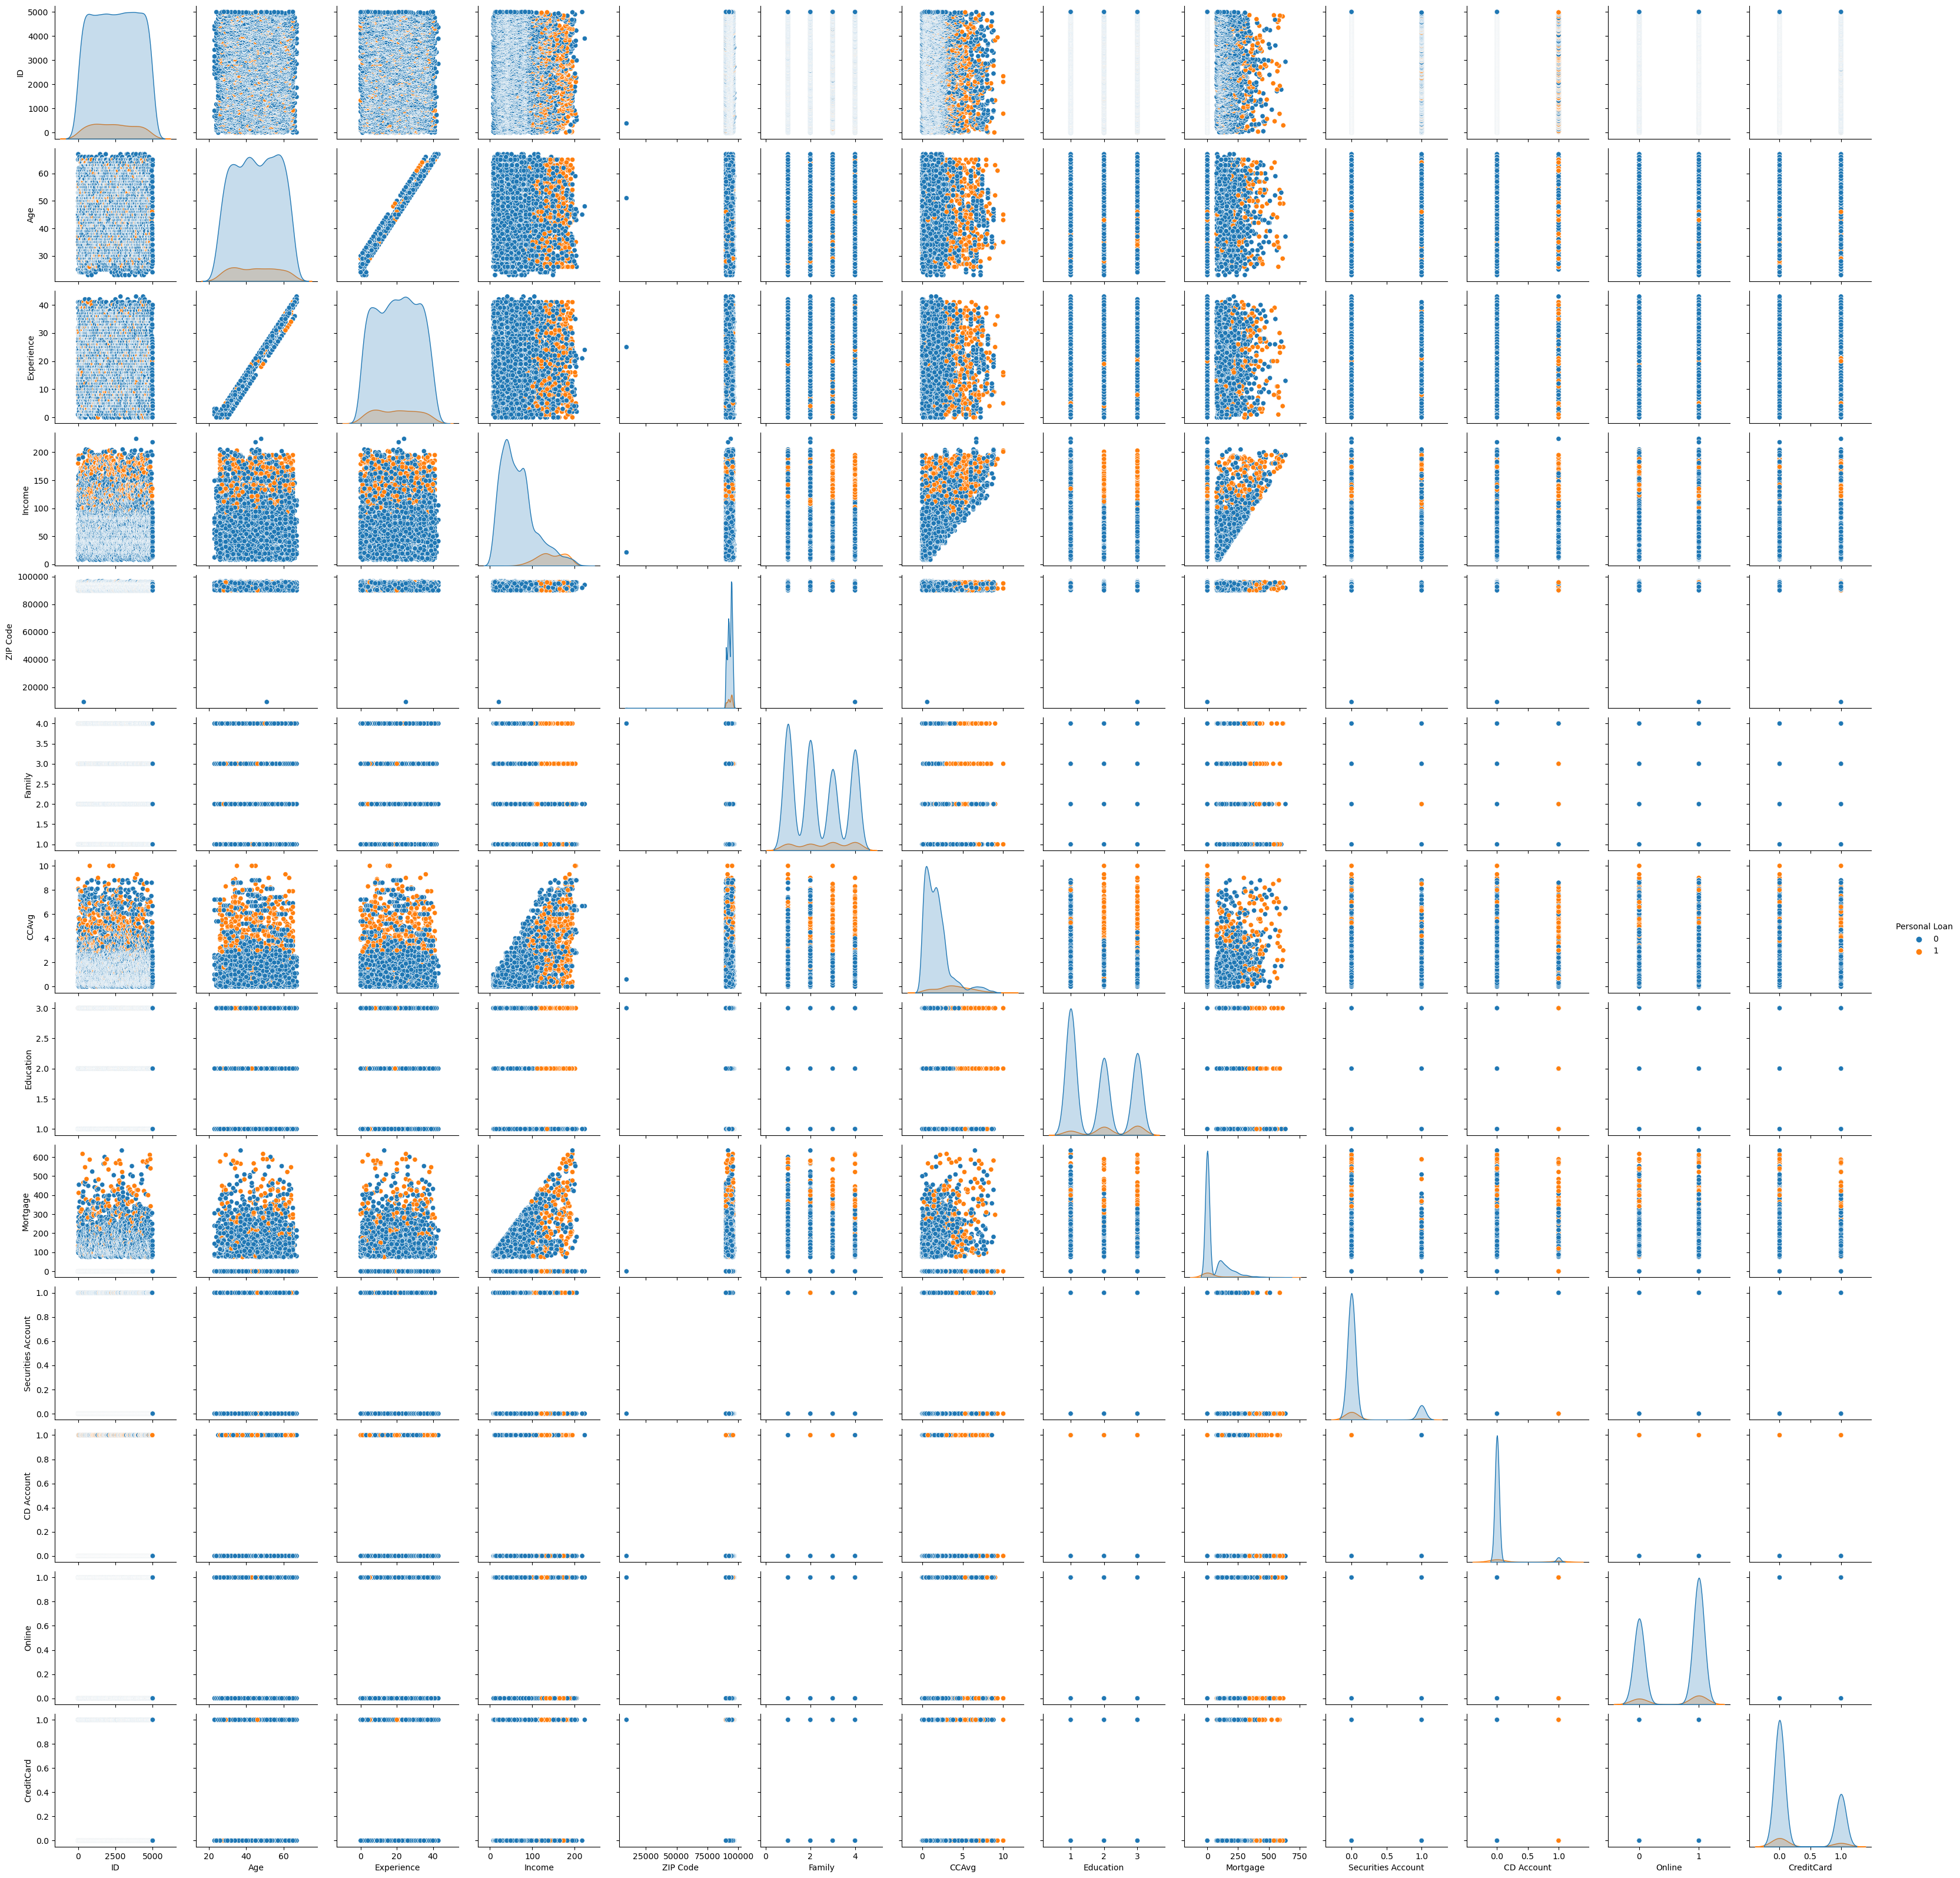

In [10]:
sns.pairplot(df,hue="Personal Loan")

In [ ]:
# Age and experience have strong positive relation
# Age and income have no linear relationship
# Age and experience have no linear relationship
#CreditCard,Online,ZIP Code,Experience,Age very less co-related with PersonalLoan

In [11]:
#Removing less co-related columns from dataframe
cols=['CreditCard','Online','ZIP Code','Experience','Age']
for i in cols:
    df.pop(i)

In [12]:
df.head()

,ID,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account
0,1,49,4,1.6,1,0,0,1,0
1,2,34,3,1.5,1,0,0,1,0
2,3,11,1,1.0,1,0,0,0,0
3,4,100,1,2.7,2,0,0,0,0
4,5,45,4,1.0,2,0,0,0,0


<h3>Train Model</h3>

In [13]:
# Creating the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...
X = df.drop('Personal Loan',axis=1).values
y = df['Personal Loan'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

<h3>Scaling<h3>

In [14]:
#Scale dataframe with Standard Scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

<h3>Logistic Regression Model</h3>

In [21]:
LR_model = LogisticRegression()
LR_model.fit(X_train_sc, y_train)
LR_model_score = LR_model.score(X_test_sc, y_test)
LR_predict = LR_model.predict(X_test_sc)
print("Accuracy: {}".format(LR_model_score))
print(metrics.confusion_matrix(y_test, LR_predict))

Accuracy: 0.942
[[1341   21]
 [  66   72]]


In [22]:
print(metrics.classification_report(y_test, LR_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1362
           1       0.77      0.52      0.62       138

    accuracy                           0.94      1500
   macro avg       0.86      0.75      0.80      1500
weighted avg       0.94      0.94      0.94      1500



<h3>Support Vector Classifier</h3>

In [23]:
SVC_model=SVC()
SVC_model.fit(X_train_sc, y_train)
SVC_model_score = SVC_model.score(X_test_sc, y_test)
SVC_predict = SVC_model.predict(X_test_sc)
print("Accuracy: {}".format(SVC_model_score))
print(metrics.confusion_matrix(y_test, SVC_predict))

Accuracy: 0.968
[[1359    3]
 [  45   93]]


In [24]:
print(metrics.classification_report(y_test, SVC_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1362
           1       0.97      0.67      0.79       138

    accuracy                           0.97      1500
   macro avg       0.97      0.84      0.89      1500
weighted avg       0.97      0.97      0.97      1500



<h3>Gaussian NB</h3>

In [25]:
GNB_model=GaussianNB()
GNB_model.fit(X_train_sc, y_train)
GNB_model_score = GNB_model.score(X_test_sc, y_test)
GNB_predict = GNB_model.predict(X_test_sc)
print("Accuracy: {}".format(GNB_model_score))
print(metrics.confusion_matrix(y_test, GNB_predict))

Accuracy: 0.8893333333333333
[[1262  100]
 [  66   72]]


In [26]:
print(metrics.classification_report(y_test, GNB_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1362
           1       0.42      0.52      0.46       138

    accuracy                           0.89      1500
   macro avg       0.68      0.72      0.70      1500
weighted avg       0.90      0.89      0.89      1500



<h3>KNN</h3>

In [60]:
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train_sc, y_train)
KNN_model_score = KNN_model.score(X_test_sc, y_test)
KNN_predict = KNN_model.predict(X_test_sc)
print("Accuracy: {}".format(KNN_model_score))
print(metrics.confusion_matrix(y_test, KNN_predict))

Accuracy: 0.96
[[1354    8]
 [  52   86]]


In [57]:
print(metrics.classification_report(y_test, KNN_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1362
           1       0.91      0.62      0.74       138

    accuracy                           0.96      1500
   macro avg       0.94      0.81      0.86      1500
weighted avg       0.96      0.96      0.96      1500



<h3>Ramdom Forest Classifier<h3>

In [47]:
RF_model=RandomForestClassifier(criterion='entropy')
RF_model.fit(X_train_sc, y_train)
RF_model_score = RF_model.score(X_test_sc, y_test)
RF_predict = RF_model.predict(X_test_sc)
print("Accuracy: {}".format(RF_model_score))
print(metrics.confusion_matrix(y_test, RF_predict))

Accuracy: 0.9826666666666667
[[1359    3]
 [  23  115]]


In [48]:
print(metrics.classification_report(y_test, RF_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1362
           1       0.97      0.83      0.90       138

    accuracy                           0.98      1500
   macro avg       0.98      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500



<h3>Gradient Boosting</h3>

In [53]:
GB_model=GradientBoostingClassifier()
GB_model.fit(X_train_sc, y_train)
GB_model_score = GB_model.score(X_test_sc, y_test)
GB_predict = GB_model.predict(X_test_sc)
print("Accuracy: {}".format(GB_model_score))
print(metrics.confusion_matrix(y_test, GB_predict))

Accuracy: 0.9853333333333333
[[1360    2]
 [  20  118]]


In [34]:
print(metrics.classification_report(y_test, GB_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1362
           1       0.98      0.86      0.91       138

    accuracy                           0.99      1500
   macro avg       0.98      0.93      0.95      1500
weighted avg       0.99      0.99      0.98      1500



<h3>Ada Boosting</h3>

In [35]:
AB_model=AdaBoostClassifier()
AB_model.fit(X_train_sc, y_train)
AB_model_score = AB_model.score(X_test_sc, y_test)
AB_predict = AB_model.predict(X_test_sc)
print("Accuracy: {}".format(AB_model_score))
print(metrics.confusion_matrix(y_test, AB_predict))

Accuracy: 0.9686666666666667
[[1351   11]
 [  36  102]]


In [36]:
print(metrics.classification_report(y_test, AB_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1362
           1       0.90      0.74      0.81       138

    accuracy                           0.97      1500
   macro avg       0.94      0.87      0.90      1500
weighted avg       0.97      0.97      0.97      1500



<h3>Bagging</h3>

In [37]:
B_model=BaggingClassifier()
B_model.fit(X_train_sc, y_train)
B_model_score = B_model.score(X_test_sc, y_test)
B_predict = B_model.predict(X_test_sc)
print("Accuracy: {}".format(B_model_score))
print(metrics.confusion_matrix(y_test, B_predict))

Accuracy: 0.9806666666666667
[[1357    5]
 [  24  114]]


In [38]:
print(metrics.classification_report(y_test, B_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1362
           1       0.96      0.83      0.89       138

    accuracy                           0.98      1500
   macro avg       0.97      0.91      0.94      1500
weighted avg       0.98      0.98      0.98      1500



<h3> Decision Tree</h3>

In [39]:
DT_model=DecisionTreeClassifier()
DT_model.fit(X_train_sc, y_train)
DT_model_score = DT_model.score(X_test_sc, y_test)
DT_predict = DT_model.predict(X_test_sc)
print("Accuracy: {}".format(DT_model_score))
print(metrics.confusion_matrix(y_test, DT_predict))

Accuracy: 0.9786666666666667
[[1354    8]
 [  24  114]]


In [40]:
print(metrics.classification_report(y_test, DT_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1362
           1       0.93      0.83      0.88       138

    accuracy                           0.98      1500
   macro avg       0.96      0.91      0.93      1500
weighted avg       0.98      0.98      0.98      1500



<h3>Result:</h3>
<p><b>Scaled Gradient Boosting</b> algorithm gives the best result with <b>accuracy=98.53%</b> and best result for class 1.</p>